In [115]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import plotly.express as px

In [116]:
f_path = "processed_files"
scaler = StandardScaler()
word_df = pd.read_csv(os.path.join(f_path, 'merged_withoutstring.csv')).loc[:,["Word"]]
merged_df = pd.read_csv(os.path.join(f_path, 'merged_withoutstring.csv'))
word_type = merged_df.loc[:,"Word type"]
merged_df = merged_df.loc[:, ~merged_df.columns.isin(['Word type'])]
merged_df = merged_df.set_index('Word', drop=True)
word_c = word_type.copy()

cdict = {'N':'m','NUM':'c', 'V': 'r', 'A': 'g', 'F': 'b'}
label = {'N':'Noun','NUM':'Numeral', 'V': 'Verb', 'A': 'Adjective', 'F': 'Function word'}
print(word_type.value_counts())

N      305
V      248
A       59
F        8
NUM      5
Name: Word type, dtype: int64


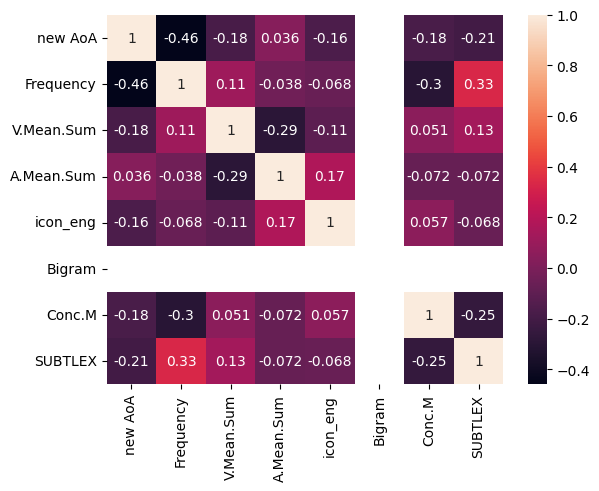

In [117]:
corr_matrix = merged_df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

<Axes: >

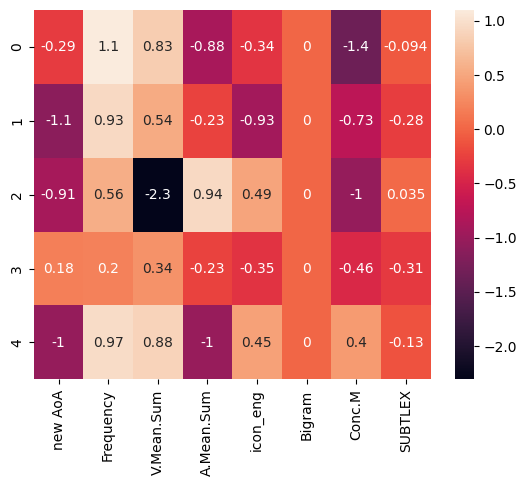

In [118]:
merged_scaled_df=merged_df.copy()
merged_scaled_df=pd.DataFrame(scaler.fit_transform(merged_scaled_df), columns=merged_scaled_df.columns)
merged_scaled_df.head()
sn.heatmap(merged_scaled_df.head(), annot=True)

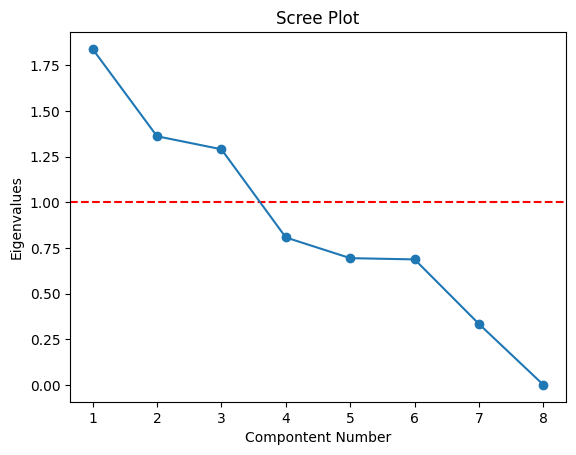

In [119]:
pca = PCA(n_components=len(merged_scaled_df.columns))
pca.fit(merged_scaled_df)
# print(pca.explained_variance_)
plt.ylabel('Eigenvalues')
plt.xlabel('Compontent Number')
plt.title('Scree Plot')
# plt.ylim(0, 10)
plt.axhline(y=1, color = 'r', linestyle='--')
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_, 'o-')
plt.show()

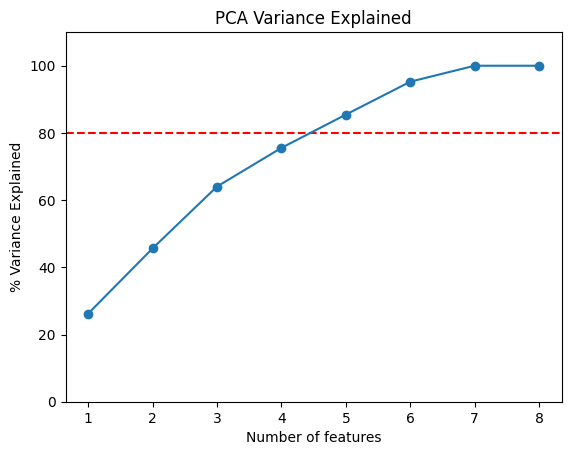

[2.62308347e-01 1.94136156e-01 1.83967899e-01 1.15128806e-01
 9.89695572e-02 9.79844359e-02 4.75047998e-02 2.41044639e-35]


In [120]:
var = np.cumsum(pca.explained_variance_ratio_*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of features')
plt.title('PCA Variance Explained')
plt.ylim(0, 110)
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(np.arange(pca.n_components_) + 1, var, 'o-')
plt.show()
print(pca.explained_variance_ratio_)

Combining those graphs, we can find that one component can explain more than 99.99% of the variances.

(625, 3)


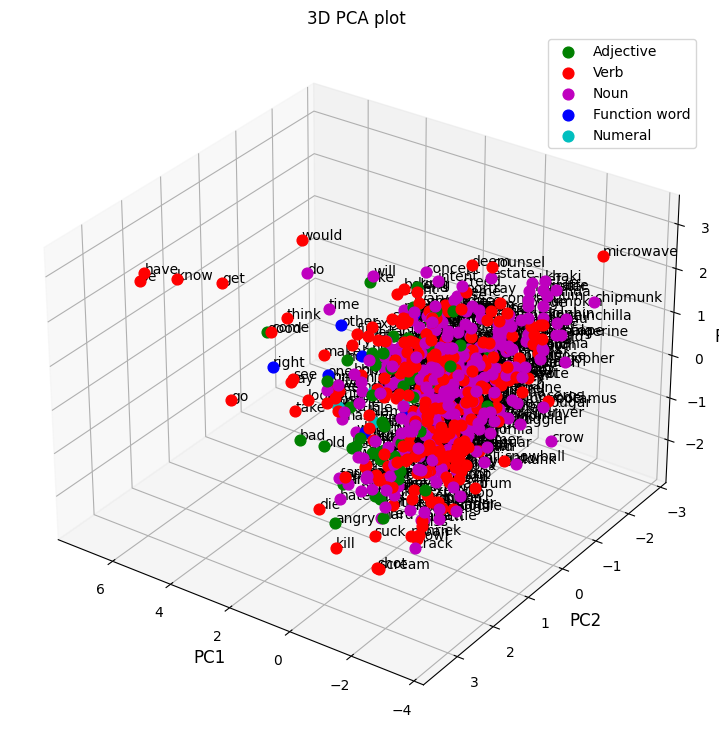

In [121]:
# new_pca = PCA(n_components=1)
# new_df = new_pca.fit_transform(merged_scaled_df)
# print(f"The amount of variance explained: {new_pca.explained_variance_}")
# print(f"Percentage of variance explained: {new_pca.explained_variance_ratio_}")
# fig, ax = plt.subplots()
# ax.xaxis.set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.set_ylim(min(new_df), max(new_df))
# ax.scatter([0]*len(new_df), new_df, marker='o', s=5, c=word_c)
# ax.set_xlim(-0.1,5)
# ax.set_ylabel('PC1')
# for i in range(len(new_df)):
#     ax.annotate(word_df.at[i, 'Word'], xy=(0.20, new_df[i]))
# plt.title('1D PCA of Words with 8 Features')
# plt.show()

td_pca = PCA(n_components=3)
td_pca.fit(merged_scaled_df)
pca_merged = td_pca.transform(merged_scaled_df)
print(np.shape(pca_merged))
Xax = pca_merged[:,0]
Yax = pca_merged[:,1]
Zax = pca_merged[:,2]

fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(Xax)):
    ax.scatter(Xax[i], Yax[i], Zax[i], c=cdict[word_type[i]], s=60, label=label[word_type[i]])
    ax.text(Xax[i], Yax[i], Zax[i],  '%s' % (word_df.at[i, 'Word']), size=10, zorder=1,  
    color='k') 
ax.set_xlabel("PC1", 
              fontsize=12)
ax.set_ylabel("PC2", 
              fontsize=12)
ax.set_zlabel("PC3", 
              fontsize=12)
ax.view_init(30, 125)
handles, labels = ax.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list)
plt.title("3D PCA plot")
plt.show()

In [122]:
five_pca = PCA(n_components=5)
five_pca.fit(merged_scaled_df)
five_val = five_pca.transform(merged_scaled_df)
print(np.shape(five_val))
word_df['PC1'] = five_val[:,0]
word_df['PC2'] = five_val[:,1]
word_df['PC3'] = five_val[:,2]
word_df['PC4'] = five_val[:,3]
word_df['PC5'] = five_val[:,4]
word_df.insert(1, 'Word type', word_type, True)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    five_val,
    labels=labels,
    dimensions=range(5),
    color=word_df['Word type']
)
fig.update_traces(diagonal_visible=False)
fig.show()

(625, 5)


In [123]:
# only for dataset update
# word_df['PC1'] = new_df
# word_df.insert(1, 'Word type', word_type, True)
# word_df.to_csv(os.path.join(f_path, "PC1.csv"), 
#               index = None,
#               header=True)